# Model 1

Importing modules for correct directory links

In [1]:
import sys
import os
import numpy as np
import json
import pandas as pd
import csv

Importing model and parameters

In [2]:
# Add the project root to sys.path
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)

# Now importing from the 'models' folder
from models.model1 import run_model1
from models.params_default import params_default

# Import functions
from models.functions import *

# Create an instance of the default parameters
params = params_default()

# Initialise File to Save Results

In [3]:
file_path = '../results/model1/model1_results.csv'

headers = ['Test Case', 'Avg Dispersion', 'Avg Distance to Goal', 'Avg Clustering Coefficient', 'Num Flocks']

def initialize_csv(file_name, headers):
    with open(file_name, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(headers)

initialize_csv(file_path, headers)

def write_to_csv(file_name, data_row):
    with open(file_name, mode='a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(data_row)


# Read in Test Cases

In [4]:
path_to_test_cases = '../test_cases/test_cases_EXAMPLE.json'

with open(path_to_test_cases) as json_file:
    test_cases = json.load(json_file)


# Run Test Cases

In [5]:
def adjust_params(params, test_case):
    '''
    Adjust the parameters based on the test cases
    '''
    
    params.num_obstacles = test_case['num_obstacles']
    params.nrows = test_case['nrows']
    params.ncols = test_case['ncols']
    params.x_spacing = test_case['x_spacing']
    params.y_spacing = test_case['y_spacing']
    params.offset = test_case['offset']
    params.beta = test_case['beta']
    
    return params
    

In [6]:
params.nrows

3

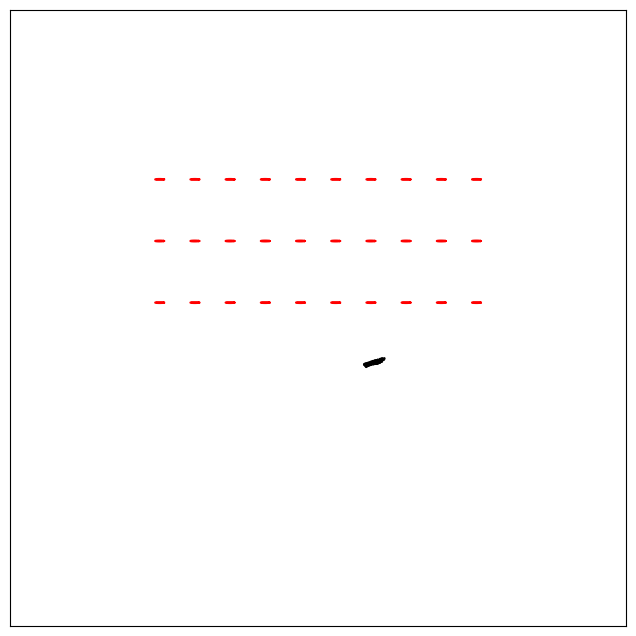

In [ ]:
num_times_to_run = 1

num_tests = num_times_to_run * len(test_cases.keys())
cnt = 0
# Loop over the test cases
for key in test_cases.keys():
    cnt += 1
    
    for _ in range(num_times_to_run):
        # Re-initialise the parameters to default
        params = params_default()
        
        print(f'RUNNING MODEL: {key}, {cnt} of {num_tests}')
        print(f'----------------------------------------')
        
        # Specify test case
        test_case = test_cases[key]

        # Adjust the parameters to test case
        params = adjust_params(params, test_case)
        
        # Run the model:
        dispersion_values, distances_to_goal, clustering_coefficients, num_flocks = run_model1(params, plot = True)
        
        # Average the metrics
        avg_dispersion, avg_distance_to_goal, avg_clustering_coefficient = return_metric_statistics(dispersion_values, distances_to_goal, clustering_coefficients)
        
        # Write to file
        data_row = [key, avg_dispersion, avg_distance_to_goal, avg_clustering_coefficient, num_flocks]
        write_to_csv(file_path, data_row)
        
        print(f'SAVED TO FILE')
    